# TensorFlow Basics

In [1]:
import tensorflow as tf

/Users/mk194903/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
hello = tf.constant('Hello World') # store as tensor objects

In [6]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [9]:
# Create Session to execute tensorflow
sess = tf.Session()

In [11]:
sess.run(hello)

b'Hello World'

# Operations

In [15]:
x = tf.constant(2)

In [16]:
y = tf.constant(3)

In [17]:
with tf.Session() as sess:
    print('Operations with Constants')
    print('Addition: ', sess.run(x+y))
    print('Subtraction: ', sess.run(x-y))
    print('Multiplication', sess.run(x*y))
    print('Division', sess.run(x/y))

Operations with Constants
Addition:  5
Subtraction:  -1
Multiplication 6
Division 0.6666666666666666


In [18]:
x = tf.placeholder(tf.int32)

In [19]:
y = tf.placeholder(tf.int32)

In [20]:
add = tf.add(x,y)

In [22]:
sub = tf.subtract(x,y)
mul = tf.multiply(x,y)

In [25]:
d = {x:20,y:30}

In [26]:
with tf.Session() as sess:
    print('Operations with Placeholders')
    print('addition', sess.run(add,feed_dict=d))
    print('Subtraction', sess.run(sub,feed_dict=d))
    print('Multiplication', sess.run(mul,feed_dict=d))

Operations with Placeholders
addition 50
Subtraction -10
Multiplication 600


# Matrixes operation

In [27]:
import numpy as np

In [29]:
a = np.array([[5.0, 5.0]])

In [30]:
b = np.array([[2.0],[2.0]])

In [32]:
a.shape

(1, 2)

In [33]:
b.shape

(2, 1)

In [35]:
mat1 = tf.constant(a)

In [36]:
mat2 = tf.constant(b)

In [38]:
matrix_multi = tf.matmul(mat1, mat2)

In [41]:
with tf.Session() as sess:
    result = sess.run(matrix_multi)
    print(result)

[[20.]]


# MNIST Data

In [42]:
from tensorflow.examples.tutorials.mnist import input_data

In [44]:
mnist = input_data.read_data_sets("dataset/MNIST_data/", one_hot=True)

Extracting dataset/MNIST_data/train-images-idx3-ubyte.gz
Extracting dataset/MNIST_data/train-labels-idx1-ubyte.gz
Extracting dataset/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting dataset/MNIST_data/t10k-labels-idx1-ubyte.gz


In [45]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [46]:
mnist.train.images.shape

(55000, 784)

In [47]:
mnist.test.num_examples

10000

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
mnist.train.labels[1]   # one hot encoding for 3

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

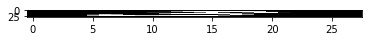

In [61]:
plt.imshow(mnist.train.images[1].reshape(28,28), cmap="gist_gray", aspect=0.02)

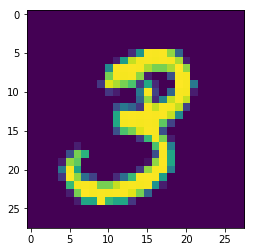

In [63]:
plt.imshow(mnist.train.images[1].reshape(28,28))

In [64]:
x = tf.placeholder(tf.float32, shape=[None,784])

In [65]:
W = tf.Variable(tf.zeros([784,10]))#weigh, 784 pixel image, 10 values of number

In [67]:
b = tf.Variable(tf.zeros([10]))

In [68]:
y = tf.matmul(x, W) + b

In [69]:
y_true = tf.placeholder(tf.float32, shape=[None,10])

In [70]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y))#defining error

In [71]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.5)# lower learning rate mean heigher accurecy. 
#method how you are trying to reduce the error

In [72]:
train = optimizer.minimize(cross_entropy)

In [73]:
init = tf.global_variables_initializer()

In [74]:
with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    for step in range(1000):
        
        batch_x , batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
    # Test the Train Model
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9168
